# <font color = 'Purple'>Id'ing fake news</font>

## <font color = 'Purple'> Group 3 </font>
### <font color = 'Purple'> Team Members: Mahesh Krishnan (C0835190), Nandini Bhatti (C0832345), Nidhi Odedra (C0832829), Nikhil Tanwar (C0835381), Vasudha Garg (C0827843) </font>

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation
import nltk
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)

### Reading dataset

In [4]:
fake = pd.read_csv('fake.csv')
true = pd.read_csv('true.csv')

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake.shape

(23481, 4)

In [8]:
true.shape

(21417, 4)

In [9]:
fake['target'] = 0
true['target'] = 1

### Combining Fake and True CSVs

In [10]:
data = pd.concat([fake,true]).reset_index(drop = True)

In [11]:
data.shape

(44898, 5)

In [12]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
data.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


### Shuffling combined dataset

In [14]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [15]:
data.head()

,title,text,subject,date,target
0,Russia Probe’s New Leader Disqualified Himsel...,With Devin Nunes recusal from the House Intel...,News,"April 6, 2017",0
1,Civilians leave IS-area in eastern Syria after...,BEIRUT (Reuters) - Hundreds of civilians left ...,worldnews,"September 22, 2017",1
2,Arizona may enforce ballot collection law: Sup...,(Reuters) - The U.S. Supreme Court on Saturday...,politicsNews,"November 5, 2016",1
3,CNN HAMMERS Kellyanne Conway For Lying About ...,Kellyanne Conway just got hammered with facts ...,News,"February 6, 2017",0
4,House tax chief says Obamacare taxes not part ...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,"March 27, 2017",1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [17]:
data.drop(["date"], axis=1, inplace=True)
data.head()

,title,text,subject,target
0,Russia Probe’s New Leader Disqualified Himsel...,With Devin Nunes recusal from the House Intel...,News,0
1,Civilians leave IS-area in eastern Syria after...,BEIRUT (Reuters) - Hundreds of civilians left ...,worldnews,1
2,Arizona may enforce ballot collection law: Sup...,(Reuters) - The U.S. Supreme Court on Saturday...,politicsNews,1
3,CNN HAMMERS Kellyanne Conway For Lying About ...,Kellyanne Conway just got hammered with facts ...,News,0
4,House tax chief says Obamacare taxes not part ...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,1


### Label Encoding

In [18]:
data['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Label']=le.fit_transform(data['subject'])

In [20]:
data.head()

,title,text,subject,target,Label
0,Russia Probe’s New Leader Disqualified Himsel...,With Devin Nunes recusal from the House Intel...,News,0,2
1,Civilians leave IS-area in eastern Syria after...,BEIRUT (Reuters) - Hundreds of civilians left ...,worldnews,1,7
2,Arizona may enforce ballot collection law: Sup...,(Reuters) - The U.S. Supreme Court on Saturday...,politicsNews,1,6
3,CNN HAMMERS Kellyanne Conway For Lying About ...,Kellyanne Conway just got hammered with facts ...,News,0,2
4,House tax chief says Obamacare taxes not part ...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,1,6


## NLP
##### <font color = 'Blue'> What is NLP? </font>
##### <font color = 'Blue'> Natural Language Processing, or NLP, is a branch of Artificial Intelligence that allows machines to read, understand, and interpret human languages. </font>

In [21]:
#convert to lower case
data['text'] = data['text'].apply(lambda x:x.lower())
data.head()

,title,text,subject,target,Label
0,Russia Probe’s New Leader Disqualified Himsel...,with devin nunes recusal from the house intel...,News,0,2
1,Civilians leave IS-area in eastern Syria after...,beirut (reuters) - hundreds of civilians left ...,worldnews,1,7
2,Arizona may enforce ballot collection law: Sup...,(reuters) - the u.s. supreme court on saturday...,politicsNews,1,6
3,CNN HAMMERS Kellyanne Conway For Lying About ...,kellyanne conway just got hammered with facts ...,News,0,2
4,House tax chief says Obamacare taxes not part ...,washington (reuters) - the republican-controll...,politicsNews,1,6


### Stopwords and Punctuation removal

In [22]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
punctuation = list(punctuation)
STOPWORDS.update(punctuation)
STOPWORDS

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [23]:
data['text_without_stopwords'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [24]:
data.head()

,title,text,subject,target,Label,text_without_stopwords
0,Russia Probe’s New Leader Disqualified Himsel...,with devin nunes recusal from the house intel...,News,0,2,devin nunes recusal house intelligence committ...
1,Civilians leave IS-area in eastern Syria after...,beirut (reuters) - hundreds of civilians left ...,worldnews,1,7,beirut (reuters) hundreds civilians left besie...
2,Arizona may enforce ballot collection law: Sup...,(reuters) - the u.s. supreme court on saturday...,politicsNews,1,6,(reuters) u.s. supreme court saturday ordered ...
3,CNN HAMMERS Kellyanne Conway For Lying About ...,kellyanne conway just got hammered with facts ...,News,0,2,kellyanne conway got hammered facts cnn lied n...
4,House tax chief says Obamacare taxes not part ...,washington (reuters) - the republican-controll...,politicsNews,1,6,washington (reuters) republican-controlled u.s...


In [25]:
print(data['text'][1])
print('Length of text:',len(data['text'][1]))

beirut (reuters) - hundreds of civilians left a besieged islamic state enclave in central syria after the syrian government and islamic state reached an evacuation deal, the syrian observatory for human rights said on friday. the syrian army could not be reached for comment but a syrian military source quoted on state media later said that the army and its allies had captured several areas in the enclave.  an insurgent source in northwestern syria said the civilians - mostly shepherds - from the enclave, straddling the border between hama and homs provinces, had arrived in rebel-held idlib province. the syrian army - supported by russian air power and iranian-backed militias - isolated the pocket, islamic state s last presence in central syria, in august during its eastward drive against the jihadists. the military source said the army had captured the areas of mazin al-baqr, al-mushirfa al-shomalia, rasm al-tawil and jawra al-nazal, .  the observatory reported that the government and 

In [26]:
print(data['text_without_stopwords'][1])
print('Length of text:',len(data['text_without_stopwords'][1]))

beirut (reuters) hundreds civilians left besieged islamic state enclave central syria syrian government islamic state reached evacuation deal, syrian observatory human rights said friday. syrian army could reached comment syrian military source quoted state media later said army allies captured several areas enclave. insurgent source northwestern syria said civilians mostly shepherds enclave, straddling border hama homs provinces, arrived rebel-held idlib province. syrian army supported russian air power iranian-backed militias isolated pocket, islamic state last presence central syria, august eastward drive jihadists. military source said army captured areas mazin al-baqr, al-mushirfa al-shomalia, rasm al-tawil jawra al-nazal, observatory reported government islamic state finalised deal thursday, allowing islamic state fighters, families civilians leave pocket cross government areas areas held islamist groups. crossed areas held tahrir al-sham, jihadist alliance includes former nusra 

In [27]:
import re
BAD_SYMBOLS = re.compile('[^0-9 a-z #+_]')
numbers = r'[0-9]'
data['text_without_stopwords'] = data['text_without_stopwords'].str.replace(BAD_SYMBOLS,'')
data['text_without_stopwords'] = data['text_without_stopwords'].str.replace(numbers,'')

In [28]:
data['text_without_stopwords'][1]

'beirut reuters hundreds civilians left besieged islamic state enclave central syria syrian government islamic state reached evacuation deal syrian observatory human rights said friday syrian army could reached comment syrian military source quoted state media later said army allies captured several areas enclave insurgent source northwestern syria said civilians mostly shepherds enclave straddling border hama homs provinces arrived rebelheld idlib province syrian army supported russian air power iranianbacked militias isolated pocket islamic state last presence central syria august eastward drive jihadists military source said army captured areas mazin albaqr almushirfa alshomalia rasm altawil jawra alnazal observatory reported government islamic state finalised deal thursday allowing islamic state fighters families civilians leave pocket cross government areas areas held islamist groups crossed areas held tahrir alsham jihadist alliance includes former nusra front group northern hama

### Lemmatization and Stemming

##### <font color = 'Blue'> Both stemming and lemmatization have the purpose of reducing a word's linguistic and occasionally derivationally related forms to a single base form but stemming is the process of removing or stemming the last few characters of a word, which frequently results in inaccurate interpretations and spelling. Lemmatization takes into account the context when converting a word to its meaning basic form, known as a Lemma. </font>

In [29]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [30]:
wl = WordNetLemmatizer()
data['lemmentized_text'] = data['text_without_stopwords'].apply(lambda x:' '.join([wl.lemmatize(word) for word in x.split()]))

In [31]:
ps = PorterStemmer()
data['stemmed_text'] = data['text_without_stopwords'].apply(lambda x:' '.join([ps.stem(word) for word in x.split()]))

In [32]:
data.head()

,title,text,subject,target,Label,text_without_stopwords,lemmentized_text,stemmed_text
0,Russia Probe’s New Leader Disqualified Himsel...,with devin nunes recusal from the house intel...,News,0,2,devin nunes recusal house intelligence committ...,devin nunes recusal house intelligence committ...,devin nune recus hous intellig committe russia...
1,Civilians leave IS-area in eastern Syria after...,beirut (reuters) - hundreds of civilians left ...,worldnews,1,7,beirut reuters hundreds civilians left besiege...,beirut reuters hundred civilian left besieged ...,beirut reuter hundr civilian left besieg islam...
2,Arizona may enforce ballot collection law: Sup...,(reuters) - the u.s. supreme court on saturday...,politicsNews,1,6,reuters us supreme court saturday ordered ariz...,reuters u supreme court saturday ordered arizo...,reuter us suprem court saturday order arizona ...
3,CNN HAMMERS Kellyanne Conway For Lying About ...,kellyanne conway just got hammered with facts ...,News,0,2,kellyanne conway got hammered facts cnn lied n...,kellyanne conway got hammered fact cnn lied ne...,kellyann conway got hammer fact cnn lie networ...
4,House tax chief says Obamacare taxes not part ...,washington (reuters) - the republican-controll...,politicsNews,1,6,washington reuters republicancontrolled us hou...,washington reuters republicancontrolled u hous...,washington reuter republicancontrol us hous re...


In [33]:
print(data['text_without_stopwords'][1])
print(len(data['text_without_stopwords'][1]))

beirut reuters hundreds civilians left besieged islamic state enclave central syria syrian government islamic state reached evacuation deal syrian observatory human rights said friday syrian army could reached comment syrian military source quoted state media later said army allies captured several areas enclave insurgent source northwestern syria said civilians mostly shepherds enclave straddling border hama homs provinces arrived rebelheld idlib province syrian army supported russian air power iranianbacked militias isolated pocket islamic state last presence central syria august eastward drive jihadists military source said army captured areas mazin albaqr almushirfa alshomalia rasm altawil jawra alnazal observatory reported government islamic state finalised deal thursday allowing islamic state fighters families civilians leave pocket cross government areas areas held islamist groups crossed areas held tahrir alsham jihadist alliance includes former nusra front group northern hama 

In [34]:
print(data['lemmentized_text'][1])
print(len(data['lemmentized_text'][1]))

beirut reuters hundred civilian left besieged islamic state enclave central syria syrian government islamic state reached evacuation deal syrian observatory human right said friday syrian army could reached comment syrian military source quoted state medium later said army ally captured several area enclave insurgent source northwestern syria said civilian mostly shepherd enclave straddling border hama homs province arrived rebelheld idlib province syrian army supported russian air power iranianbacked militia isolated pocket islamic state last presence central syria august eastward drive jihadist military source said army captured area mazin albaqr almushirfa alshomalia rasm altawil jawra alnazal observatory reported government islamic state finalised deal thursday allowing islamic state fighter family civilian leave pocket cross government area area held islamist group crossed area held tahrir alsham jihadist alliance includes former nusra front group northern hama eastern idlib provi

In [35]:
print(data['stemmed_text'][1])
print(len(data['stemmed_text'][1]))

beirut reuter hundr civilian left besieg islam state enclav central syria syrian govern islam state reach evacu deal syrian observatori human right said friday syrian armi could reach comment syrian militari sourc quot state media later said armi alli captur sever area enclav insurg sourc northwestern syria said civilian mostli shepherd enclav straddl border hama hom provinc arriv rebelheld idlib provinc syrian armi support russian air power iranianback militia isol pocket islam state last presenc central syria august eastward drive jihadist militari sourc said armi captur area mazin albaqr almushirfa alshomalia rasm altawil jawra alnaz observatori report govern islam state finalis deal thursday allow islam state fighter famili civilian leav pocket cross govern area area held islamist group cross area held tahrir alsham jihadist allianc includ former nusra front group northern hama eastern idlib provinc said other move camp set west enclav governmentheld area accord tribal deal british

### Data Visualization

###### How many articles per subject?

In [36]:
data.groupby(['subject'])['text'].count()

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64

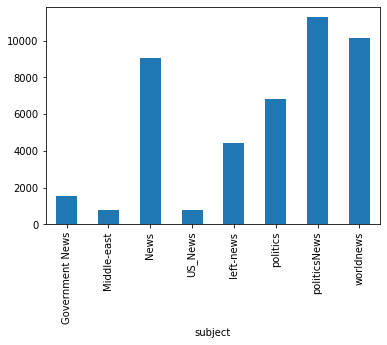

In [37]:
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

###### Total Count of fake and true records.

In [38]:
data.groupby(['target'])['text'].count()

target
0    23481
1    21417
Name: text, dtype: int64

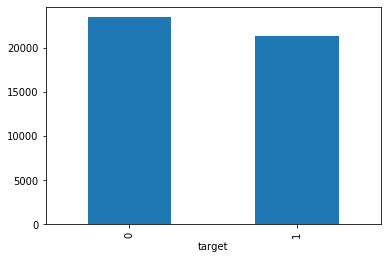

In [39]:
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

##### Wordcloud for fake and true news

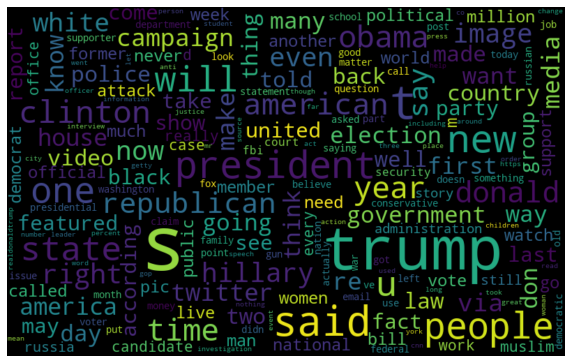

In [40]:
from wordcloud import WordCloud

fake_data = data[data['target'] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width=800, 
                      height=500,
                      max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

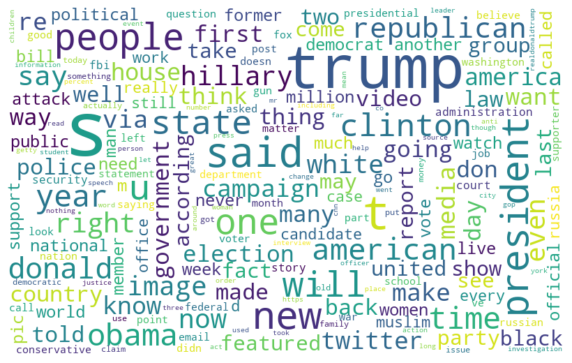

In [41]:
from wordcloud import WordCloud

real_data = data[data["target"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,max_font_size=110, background_color='white',
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Tf-Idf vectorizer
##### What is TF-idf vectorizer?
##### TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(data['lemmentized_text'])
labels = data.target
features.shape
features

<44898x348642 sparse matrix of type '<class 'numpy.float64'>'
	with 11647516 stored elements in Compressed Sparse Row format>

In [43]:
subject_id_df = data[['subject', 'Label']].drop_duplicates().sort_values('Label')
subject_to_id = dict(subject_id_df.values)
id_to_subject = dict(subject_id_df[['Label', 'subject']].values)

In [44]:
subject_to_id

{'Government News': 0,
 'Middle-east': 1,
 'News': 2,
 'US_News': 3,
 'left-news': 4,
 'politics': 5,
 'politicsNews': 6,
 'worldnews': 7}

### Chi2 
##### <font color = 'Blue'> What is Chi2 ? </font>
##### <font color = 'Blue'> Chi-Square is to be used when the feature is categorical, the target variable is any way can be thought as categorical. It measures the degree of association between two categorical variables. </font>

In [45]:
#https://medium.com/tokopedia-data/step-by-step-text-classification-fa439608e79e

from sklearn.feature_selection import chi2

N = 3
for newstype, subject_id in sorted(subject_to_id.items()):
    features_chi2 = chi2(features, labels == subject_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(newstype))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Government News':
  . Most correlated unigrams:
       . via
       . image
       . reuters
  . Most correlated bigrams:
       . president donald
       . image via
       . washington reuters
# 'Middle-east':
  . Most correlated unigrams:
       . via
       . image
       . reuters
  . Most correlated bigrams:
       . president donald
       . image via
       . washington reuters
# 'News':
  . Most correlated unigrams:
       . fundshe
       . fundthe
       . zynga
  . Most correlated bigrams:
       . fundraising operation
       . fundraising nearly
       . fundraising group
# 'US_News':
  . Most correlated unigrams:
       . fundshe
       . fundthe
       . zynga
  . Most correlated bigrams:
       . fundraising operation
       . fundraising nearly
       . fundraising group
# 'left-news':
  . Most correlated unigrams:
       . fundshe
       . fundthe
       . zynga
  . Most correlated bigrams:
       . fundraising operation
       . fundraising nearly
       . fundra

### Model deployment

#### <font color = 'Blue'> What is Ensemble Model? </font>
#### <font color = 'Blue'>Ensemble models is a machine learning approach to combine multiple other Models in the prediction process. </font>

In [46]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

####  <font color='Blue'> 1.Random Forest Classifier: A random forest is a machine learning technique that’s used to solve regression and classification problems. A random forest algorithm consists of many decision trees. </font> 
####  <font color='Blue'> 2.Multinominal Naive Bayes : Multinomial Naive Bayes is one of the most popular supervised learning classifications that is used for the analysis of the categorical text data. It is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). </font> 
####  <font color='Blue'> 3.Logistic Regression : Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, true/ false, 0or1 based on prior observations of a data set. </font> 
####  <font color='Blue'> 4.Decision Tree Classifier : It is a Supervised Machine Learning where the data is continuously split according to a certain parameter. </font> 

In [47]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(criterion = 'entropy', max_depth=20, splitter='best', random_state=42)
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,features,labels, scoring='accuracy',cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.815782
1,RandomForestClassifier,1,0.838501
2,RandomForestClassifier,2,0.782774
3,MultinomialNB,0,0.962248
4,MultinomialNB,1,0.966056
5,MultinomialNB,2,0.966591
6,LogisticRegression,0,0.990111
7,LogisticRegression,1,0.991247
8,LogisticRegression,2,0.991514
9,DecisionTreeClassifier,0,0.995657


### Accuracy Comparison

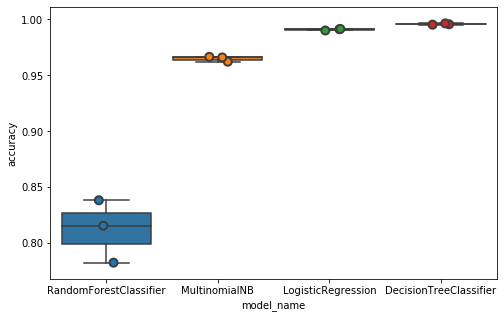

In [49]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,size=8, jitter=True, edgecolor="gray", linewidth=2)

### Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [51]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=20, splitter='best', random_state=42)
model.fit(features,labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [52]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

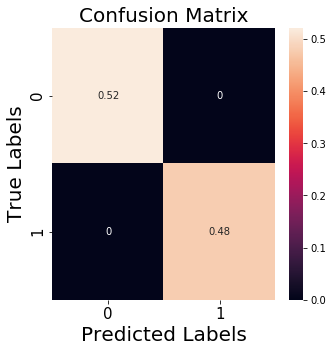

In [53]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_pred, y_test, normalize='all')
plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

In [54]:
sample = ['washington (reuters) - u.s. president donald trump is likely to make a stop in china in november during his first official visit to asia, a u.s. official said on tuesday, a trip that will come amid tensions over north korea’s nuclear tests. washington and its allies have said there is a growing urgency for china, north korea’s top ally and trading partner, to apply more pressure on its already isolated neighbor to get it to back down on its nuclear weapons and missiles programs. chinese president xi jinping had invited trump to visit china during their meeting in april in palm beach, florida. the two leaders also met on the sidelines on the g20 summit in july. trump is set to attend the u.s.-asean summit and the east asia summit in the philippines in november, as well as the asia pacific economic cooperation (apec) summit in vietnam. china’s foreign ministry did not immediately respond to a reuters request for comment on trump’s potential visit. japanese public broadcaster nhk cited unnamed diplomatic sources saying that trump was also considering visiting japan and south korea during his asian tour in november. in february, trump accepted prime minister shinzo abe’s invitation to visit japan by the end of the year. “the february agreement is still valid. we would definitely like to make it happen sometime within this year. but no specific timing has been fixed yet,” a japanese foreign ministry official said. also, the japanese daily yomiuri shimbun said on wednesday japan, the united states and south korea are in final stages of talks to hold a trilateral summit on the sidelines of the u.n. general assembly in new york. the newspaper, citing unnamed government sources, reported the meeting between trump, abe and south korean president moon jae-in could take place on sept. 21 and would focus on bolstering cooperation in response to north korean provocation. on monday, the u.n. security council unanimously voted to step up sanctions on north korea, with its profitable textile exports now banned and fuel supplies capped. after several days of negotiations on the resolution, washington dropped several measures to win the support of russia and china, including a bid for an oil embargo and the blacklisting of north korean leader kim jong un and the national airline. in hong kong, former white house chief strategist steve bannon told the south china morning post the results of a u.s.-led investigation into alleged chinese intellectual property theft would be announced before the beijing summit to reset bilateral trade. the far-right architect of trump’s 2016 election victory, bannon told an investor conference, organized by a unit of china’s largest brokerage, that trump and xi had a rapport that should enable them to work out differences, said an attendee at the meeting which was closed to the press. bannon, who was let go by trump last month, told a private lunch gathering in hong kong that he still “speaks with president donald trump every two to three days,” the wall street journal reported.']
text_features = tfidf.transform(sample)
predictions = model.predict(text_features)
for text, predicted in zip(sample, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(predicted))
    print("")

"washington (reuters) - u.s. president donald trump is likely to make a stop in china in november during his first official visit to asia, a u.s. official said on tuesday, a trip that will come amid tensions over north korea’s nuclear tests. washington and its allies have said there is a growing urgency for china, north korea’s top ally and trading partner, to apply more pressure on its already isolated neighbor to get it to back down on its nuclear weapons and missiles programs. chinese president xi jinping had invited trump to visit china during their meeting in april in palm beach, florida. the two leaders also met on the sidelines on the g20 summit in july. trump is set to attend the u.s.-asean summit and the east asia summit in the philippines in november, as well as the asia pacific economic cooperation (apec) summit in vietnam. china’s foreign ministry did not immediately respond to a reuters request for comment on trump’s potential visit. japanese public broadcaster nhk cited u